In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
HOULDOUT = 10
%matplotlib inline

In [3]:
def PCA_(X, k):
    if(k > X.shape[1]):
        print("Erro: numero de componentes deve ser menor")
        return None
    mean_vector = np.mean(X.T, axis = 1)                #cria o vetor medio
    centered_matrix = X - mean_vector                   #cria a matriz de diferencas entre os data points e o vetor medio
    centered_matrix = centered_matrix.astype(None)
    cov_matrix = np.cov(centered_matrix.T)              #matriz de covariancia
    values, vectors = np.linalg.eig(cov_matrix)         #autovalores e autovetores
    return vectors.T.dot(centered_matrix.T).T[:,:k]     #retorna os dados transformados para k componentes

In [4]:
def PCA_Err_Min(X, k, Y):
    if(k > X.shape[1]):
        print("Erro: numero de componentes deve ser menor")
        return None
    mean_vector = np.mean(X.T, axis = 1)                #cria o vetor medio
    centered_matrix = X - mean_vector                   #cria a matriz de diferencas entre os data points e o vetor medio
    centered_matrix = centered_matrix.astype(None)
    cov_matrix = np.cov(centered_matrix.T)              #matriz de covariancia
    values, vectors = np.linalg.eig(cov_matrix)         #autovalores e autovetores

    #----
    
    scores = []
    classes = np.unique(Y)
    for d in range(X.shape[1]):                         #para cada feature
        scores_c1 = []                                  #guardar os valores de cada classe
        scores_c2 = []                                  #...
        for n in range(X.shape[0]):                     #para cada data point
            if(Y[n] == classes[0]):
                scores_c1.append(X[n,d])                #valores para a classe1
            if(Y[n] == classes[1]):
                scores_c2.append(X[n,d])                #valores para a classe2
        s = (np.mean(scores_c1) - np.mean(scores_c2)) ** 2 / values[d]  #calcula o score
        scores.append(s)                                #armazena o score

    scores_ = list(scores)
    X_ = []
    for _ in range(k):
        indice_max = scores.index(max(scores_))         #acha o indice da feature com maior score
        X_.append(X[:,indice_max])                      #guarda a coluna da featura desse indice
        #scores_.pop(indice_max)
        scores_.remove(max(scores_))                    #remove o valor maximo
        
    return np.array(X_).T

In [5]:
def Normalizacao(X):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler.transform(X)

In [6]:
def CarregarDatasets():
    datasets = []

    banknote = pd.read_csv('datasets\\banknote\\data_banknote_authentication.txt', header=None)
    X = banknote.values[:,:-1]
    X = Normalizacao(X)
    Y = banknote.values[:,-1]
    datasets.append((X, Y, 'banknote'))

    bank = pd.read_csv('datasets\\bank\\bank.csv', sep=';')
    bank = CategoricoParaNumerico(bank)
    X = bank.values[:,:-1].astype(None)
    X = Normalizacao(X)
    Y = bank.values[:,-1].astype(None)
    datasets.append((X, Y, 'bank'))

    climate = pd.read_csv('datasets\\climate\\ClimateModel.csv', header=None)
    X = climate.values[:,:-1]
    X = Normalizacao(X)
    Y = climate.values[:,-1]
    datasets.append((X, Y, 'climate'))

    debrecen = pd.read_csv('datasets\\debrecen\\csv_result-messidor_features.csv')
    X = debrecen.values[:,1:-1]
    X = Normalizacao(X)
    Y = debrecen.values[:,-1]
    datasets.append((X, Y, 'debrecen'))

    occupancy = pd.read_csv('datasets\\occupancy\\datatraining.txt')
    X = occupancy.values[:,1:-1].astype(None)
    X = Normalizacao(X)
    Y = occupancy.values[:,-1].astype(None)
    datasets.append((X, Y, 'occupancy'))

    pima = pd.read_csv('datasets\\pima\\diabetes.csv')
    X = pima.values[:,:-1].astype(None)
    X = Normalizacao(X)
    Y = pima.values[:,-1].astype(None)
    datasets.append((X, Y, 'pima'))

    spambase = pd.read_csv('datasets\\spambase\\spambase.data.txt', header=None)
    X = spambase.values[:,:-1].astype(None)
    X = Normalizacao(X)
    Y = spambase.values[:,-1].astype(None)
    datasets.append((X, Y, 'spambase'))

    vcolumn = pd.read_csv('datasets\\vcolumn\\csv_result-column_3C_weka.csv')
    X = vcolumn.values[:,1:-1]
    X = Normalizacao(X)
    Y = vcolumn.values[:,-1]
    datasets.append((X, Y, 'vcolumn'))

    wdbc = pd.read_csv('datasets\\wdbc\\wdbc.data.txt', header=None)
    X = wdbc.values[:,2:]
    X = Normalizacao(X)
    Y = wdbc.values[:,1]
    datasets.append((X, Y, 'wdbc'))

    return datasets

In [7]:
def CategoricoParaNumerico(dataset):
    lb_make = LabelEncoder()
    dataset = dataset.values
    
    for c in range(dataset.shape[1]):
        dataset[:,c] = lb_make.fit_transform(dataset[:,c])

    return pd.DataFrame(dataset)

In [8]:
def TreinarClassificadores(X, Y):
    scores_tree = []
    scores_nb = []
    scores_ld = []
    scores_1nn = []
    
    for i in range(HOULDOUT):
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

        clf_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
        clf_gnb = GaussianNB().fit(X_train, y_train)
        clf_ld = LinearDiscriminantAnalysis().fit(X_train, y_train)
        clf_1nn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
        
        scores_tree.append(clf_tree.score(X_test, y_test))
        scores_nb.append(clf_gnb.score(X_test, y_test))
        scores_ld.append(clf_ld.score(X_test, y_test))
        scores_1nn.append(clf_1nn.score(X_test, y_test))

    scores_tree = np.array(scores_tree).mean() * 100
    scores_nb = np.array(scores_nb).mean() * 100
    scores_ld = np.array(scores_ld).mean() * 100
    scores_1nn = np.array(scores_1nn).mean() * 100

    return (scores_tree, scores_nb, scores_ld, scores_1nn)

In [9]:
def AplicarPCA(n, X):
    
    pca = PCA(n_components = n)
    pca.fit(X)
    return pca.transform(X)

In [110]:
def ImprimirGraficos(acc, acc2, name):
    
    dic = ["Decision Tree", "Naive Bayes", "Linear Discriminant", "1-NN"]
    
    x = np.arange(1, len(acc)+1)

    for i in range(4):
        #plt.subplot(1,2,1)
        plt.figure(i)
        plt.title(name+" - "+dic[i])
        plt.plot(x, acc[:,i], color='green')
        plt.plot(x, acc2[:,i], color='blue')
        plt.ylabel('Acuracia media')
        plt.xlabel('Numero de componentes')
        #plt.legend()
        plt.grid()
    plt.show()  

In [135]:
def CalcularAcuracias(dataset):
    acc_pca = []
    acc_pca_min = []
    
    for n_components in range(1, dataset[0].shape[1]+1):
        acc_pca.append(list(TreinarClassificadores(PCA_(dataset[0], n_components), dataset[1])))
        acc_pca_min.append(list(TreinarClassificadores(PCA_Err_Min(dataset[0], n_components, dataset[1]), dataset[1])))
        
    acc_pca = np.array(acc_pca)
    acc_pca_min = np.array(acc_pca_min)
        
    return (acc_pca, acc_pca_min)

In [136]:
datasets = CarregarDatasets()


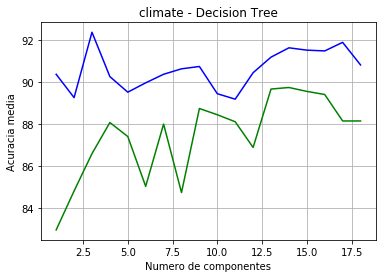

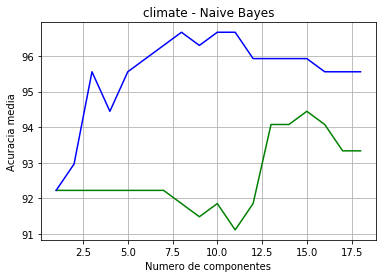

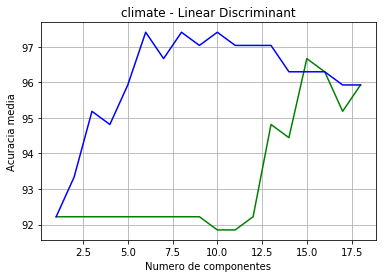

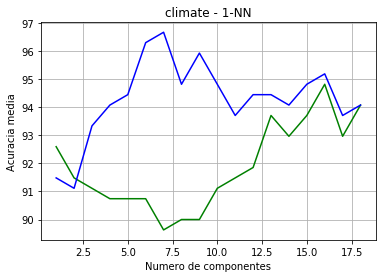

In [142]:
a,b = CalcularAcuracias(datasets[2])
ImprimirGraficos(a, b, datasets[2][2])